In [60]:
import numpy as np
import matplotlib.pylab as plt
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import scipy.optimize as optimization

In [61]:
%matplotlib notebook

In [62]:
L = AssignQuantity(30,'micrometer')
x = np.linspace(-L,L,1000)
x_mag = x.magnitude

Z2minforhist = 0.0
Z2maxforhist = .06
Z2offset = 0.001

6.666666666666667 micrometer
20.0 micrometer


<IPython.core.display.Javascript object>


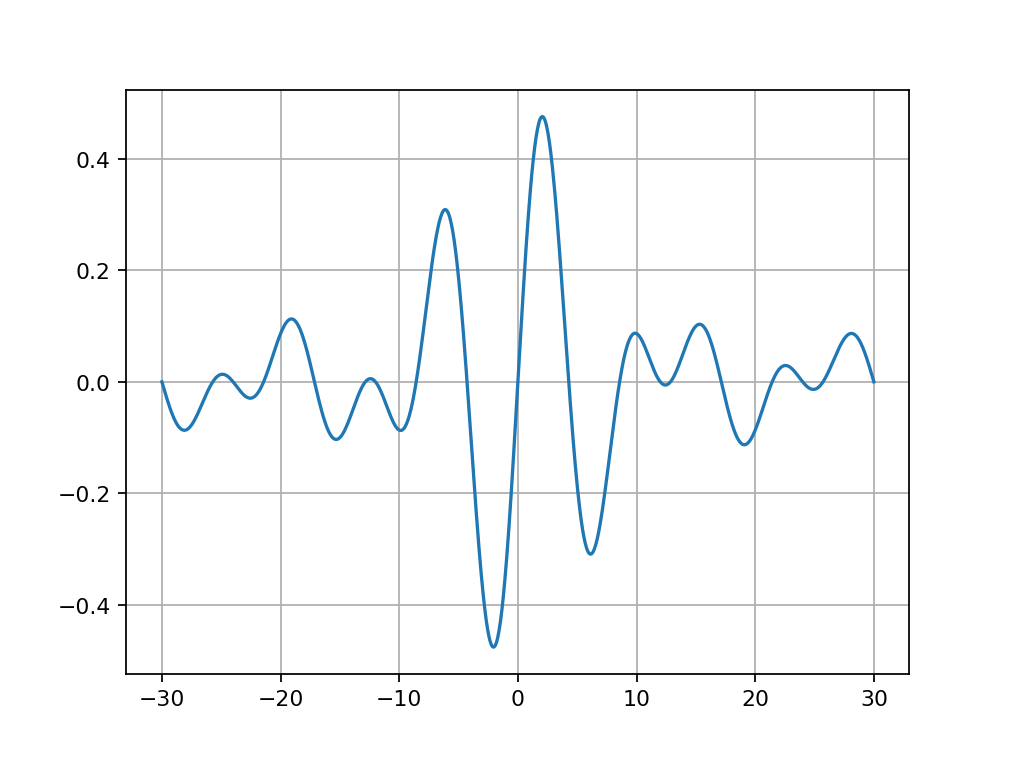

<IPython.core.display.Javascript object>


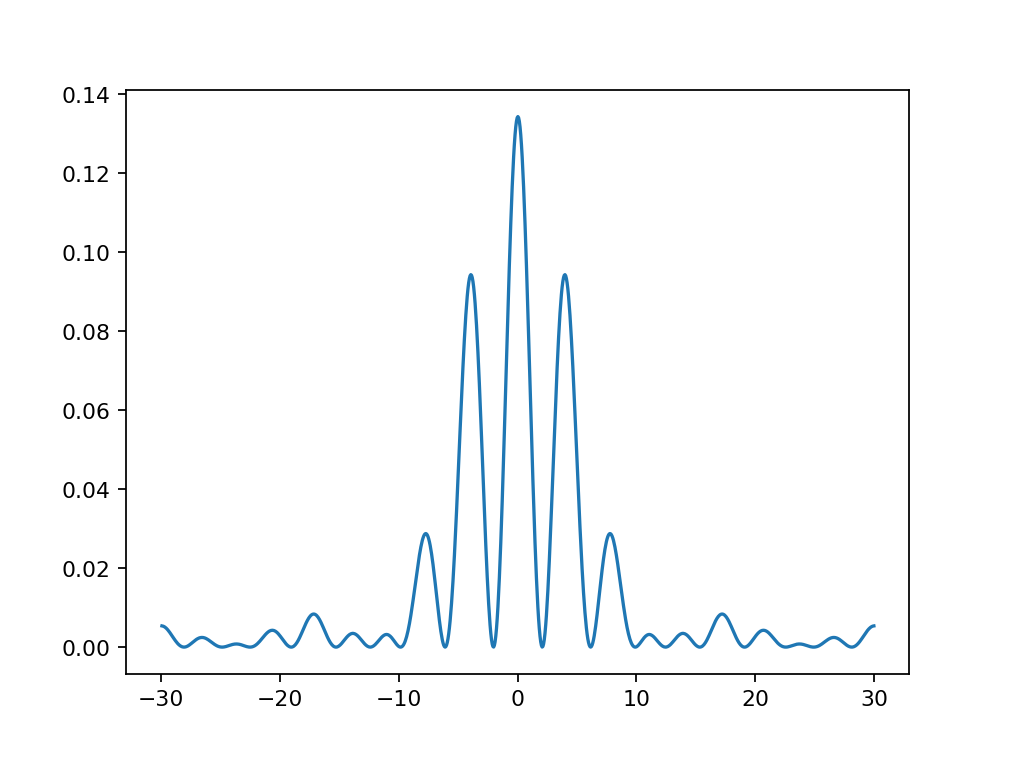

In [63]:
amplitude = .1
amplitude9 = AssignQuantity(amplitude,'micrometers')
f9 = np.sin(x/L*np.pi*9)*amplitude9; print(2*L/9)
amplitude8 = AssignQuantity(amplitude,'micrometers')
f8 = np.sin(x/L*np.pi*8)*amplitude8
amplitude7 = AssignQuantity(amplitude,'micrometers')
f7 = np.sin(x/L*np.pi*7)*amplitude7
amplitude6 = AssignQuantity(amplitude,'micrometers')
f6 = np.sin(x/L*np.pi*6)*amplitude6
amplitude5 = AssignQuantity(amplitude,'micrometers')
f5 = np.sin(x/L*np.pi*5)*amplitude5
amplitude4 = AssignQuantity(amplitude,'micrometers')
f4 = np.sin(x/L*np.pi*4)*amplitude4
amplitude3 = AssignQuantity(amplitude,'micrometers')
f3 = np.sin(x/L*np.pi*3)*amplitude3; print(2*L/3)

# f = f9+f8+f7+f6+f5+f4+f3
f = f9+f8+f7+f6+f5
plt.figure()
plt.plot(x_mag,f.magnitude)
plt.grid(True)
Z2 = (np.diff(f)/np.diff(x))**2
Z2_mag = Z2.magnitude
plt.figure()
plt.plot(x_mag[1:],Z2_mag)

<IPython.core.display.Javascript object>


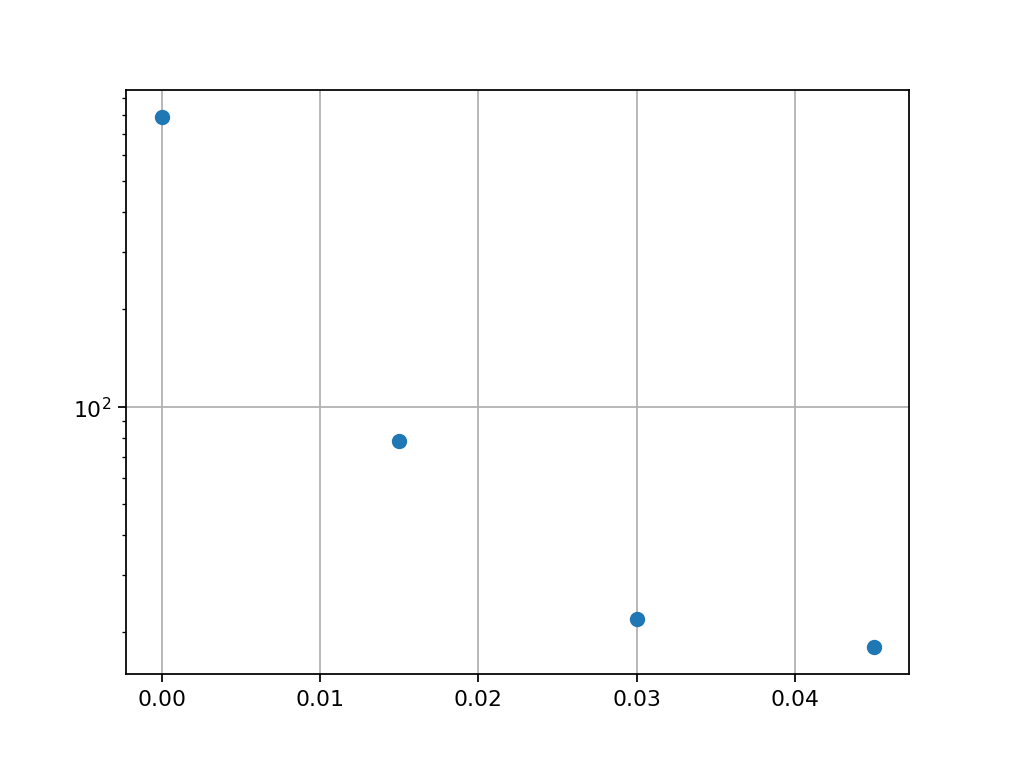

In [64]:
nbins = 4
counts,bins = np.histogram(Z2_mag,bins=nbins,range=(Z2minforhist,Z2maxforhist))
plt.figure()
plt.semilogy(bins[0:-1],counts,'o')
plt.grid(True)

In [65]:
# Do a linear fit
f_linear = lambda x, a, b: a + b*x   # function to fit
# solution, corr = optimization.curve_fit(f_linear, bins+Z2offset, np.log(counts), [5, -100], errors)
solution, corr = optimization.curve_fit(f_linear, bins[0:-1]+Z2offset, np.log(counts), [5, -100])
a_linear_optimized = solution[0]; print('a_linear_optimized', a_linear_optimized)
b_linear_optimized = solution[1]; print('b_linear_optimized', b_linear_optimized)
sigma2G = -1/b_linear_optimized
sigmaG = np.sqrt(sigma2G); print('sigmaG', sigmaG)

a_linear_optimized 6.228207495736671
b_linear_optimized -84.07099985356774
sigmaG 0.10906286290533952
